In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Modelling & Numerical Methods <a class="tocSkip">

## PDE Solvers: Finite Difference Methods 2 <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Upwind-vs-central-discretrisation" data-toc-modified-id="Homework---Upwind-vs-central-discretrisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Upwind vs central discretrisation</a></span></li><li><span><a href="#Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star$]-[from-Comp-Math]" data-toc-modified-id="Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star$]-[from-Comp-Math]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Larger stencils / higher orders of accuracy [$\star$] [from Comp Math]</a></span></li><li><span><a href="#Homework---Stability-study-for-advection-diffusion-using-FTCS" data-toc-modified-id="Homework---Stability-study-for-advection-diffusion-using-FTCS-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Stability study for advection-diffusion using FTCS</a></span></li><li><span><a href="#Homework---An-analytical-solution-to-advection-diffusion-[from-Comp-Math]" data-toc-modified-id="Homework---An-analytical-solution-to-advection-diffusion-[from-Comp-Math]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - An analytical solution to advection-diffusion [from Comp Math]</a></span></li><li><span><a href="#Homework---Pure-advection---impact-of-time-step-[from-Comp-Math]" data-toc-modified-id="Homework---Pure-advection---impact-of-time-step-[from-Comp-Math]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Pure advection - impact of time step [from Comp Math]</a></span></li></ul></li></ul></div>

In [4]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
# from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Upwind vs central discretrisation

Use our codes `BVP_AD_central` and `BVP_AD_upwind` to compute and plot error convergence for these two schemes for our test problem from the lecture with a Peclet number of 10.
    
Hence, establish that even though the upwind scheme is coupled with a second-order scheme for diffusion, it is the first-order contribution to the overall error which ultimately dominates and so the overall scheme is only first-order accurate.


[-1.00377926e-05  1.00377926e-05  4.83639098e-05  1.21531952e-04
  2.61216395e-04  5.27886697e-04  1.03698455e-03  2.00889862e-03
  3.86437094e-03  7.40663629e-03  1.41691429e-02  2.70793827e-02
  5.17262041e-02  9.87792269e-02  1.88607725e-01  3.60098494e-01
  6.87489962e-01  1.31251004e+00]
[0.00000000e+00 3.63582646e-05 1.01832508e-04 2.19739031e-04
 4.32066006e-04 8.14426061e-04 1.50298300e-03 2.74294164e-03
 4.97586873e-03 8.99694105e-03 1.62381191e-02 2.92780884e-02
 5.27605657e-02 9.50479920e-02 1.71199515e-01 3.08333766e-01
 5.55286183e-01 1.00000000e+00]


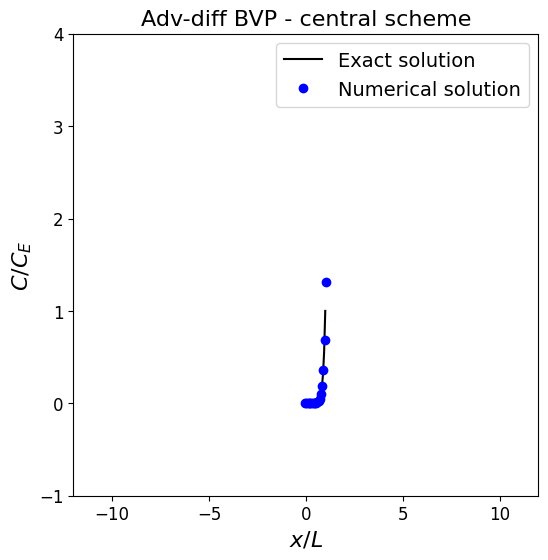

In [35]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C
errors = []

# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 16)

# construct the exact solution
xf = np.linspace(0, L, 18)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# find error
print(C)
print(Cex)
error = (Cex - C)


# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(-12, 12);
ax1.set_ylim(-1, 4);

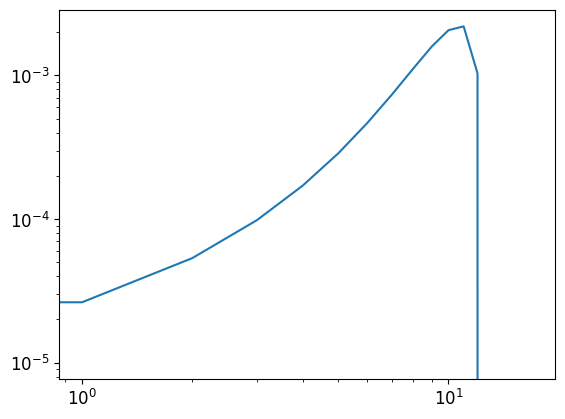

In [36]:
plt.loglog(error)

<div class="optional">

## Homework - Larger stencils / higher orders of accuracy [$\star$] [from Comp Math]

We saw in the lecture first- and second-order approximations to the first derivative.

By making use of more points (expanding the stencil) it is possible to come up with approximations of arbitrary order.

Tables of coefficients, assuming a uniform mesh, can be found at:
<https://en.wikipedia.org/wiki/Finite_difference_coefficient>

Try expanding our example from the lecture where we computed the first derivative of $\sin(x)$ at the location $x=0.8$ and plotted the error as a function of $\Delta x$, with some other examples of finite difference stencils from the tables at that web page.

[NB. the part of the question above is quite simple - in the sample solution I demonstrate an implementation of the third order accurate scheme; the part of the question below is more complicated].

Note that in the section of that web page titled "Arbitrary stencil points" it also gives a matrix system which can be solved for the finite difference coefficients which provides an approximation of arbitrary order derivatices on an arbitrary stencil. 

For a more in-depth description and derivation take a look at: <http://web.media.mit.edu/~crtaylor/calculator.html>
(click on "How does it work?").

Write some code to construct and solve this matrix system, and hence extend the convergence plot we presented above for the first derivative of $\sin(x)$ and $x=0.8$ for orders 1-6.

</div>

## Homework - Stability study for advection-diffusion using FTCS

Play around with the example from the lecture in the section "Stability study for advection-diffusion". In particular play around with the physical and numerical parameters and investigate further the interplay between these, the locations of eigenvalues in the complex plane, and the observed stability of the numerical solver.

## Homework - An analytical solution to advection-diffusion [from Comp Math]

An exact solution to the advection-diffusion equation is given by


$$ c(x,t) = \frac{1}{\sqrt{4\pi \, \kappa \,t}}\exp\left  (-\frac{(x-Ut)^2}{4\kappa \, t}\right).$$


1. Note that this holds in an infinite domain - we can make use of it only as long as our numerical solution is far away from boundaries, or in a periodic domain as long as the solution behaviour does not start to encroach on itself.


2. The initial condition that this solution corresponds to is a [Dirac-delta function](https://en.wikipedia.org/wiki/Dirac_delta_function). We clearly can't represent this on our mesh as it has infinitesimal thickness - all sorts of problems would arise if we tried to. But what we can do is assume that our simulation starts at some $t>0$ and initialise our problem with the corresponding exact solution (which for $t>0$ is a Gaussian and for sufficiently large times can be represented on our mesh).


Write a function to evaluate this exact analytical solution and use it to initialise a simulation and plot a comparison between the exact and analytical solution at later times.

I suggest you use periodic boundary conditions (e.g. your starting point could be our function from the lecture `solve_adv_diff_Gaussian2`).

First try selecting some appropriate physical and numerical parameters such that you have a stable solution and avoid boundaries. Then try refining the spatial and temporal mesh to see if your solution gets closer to the exact solution.

## Homework - Pure advection - impact of time step [from Comp Math]

Write a solver for a pure advection problem in a periodic domain using forward Euler with upwind differences in space and with a Gaussian initial condition.

First test that it works/fails based on the CFL condition.

Then update the solver such that it selects the timestep automatically to satisfy a user-defined target Courant number, e.g. look to enforce a Courant number of 0.8.